In [19]:
import pandas as pd
import talib
import matplotlib.pyplot as plt


## Reading the data

In [20]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(r'C:\Users\Toshiba\Desktop\Kifiya AIM 1\Week 1\Data\yfinance_data\yfinance_data\AAPL_historical_data.csv')

# Display the first few rows of the data
print(df.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


       Open      High       Low     Close     Volume  SMA_20  SMA_50  RSI  \
0  0.128348  0.128906  0.128348  0.128348  469033600     NaN     NaN  NaN   
1  0.122210  0.122210  0.121652  0.121652  175884800     NaN     NaN  NaN   
2  0.113281  0.113281  0.112723  0.112723  105728000     NaN     NaN  NaN   
3  0.115513  0.116071  0.115513  0.115513   86441600     NaN     NaN  NaN   
4  0.118862  0.119420  0.118862  0.118862   73449600     NaN     NaN  NaN   

   MACD  MACD_Signal  MACD_Hist  
0   NaN          NaN        NaN  
1   NaN          NaN        NaN  
2   NaN          NaN        NaN  
3   NaN          NaN        NaN  
4   NaN          NaN        NaN  


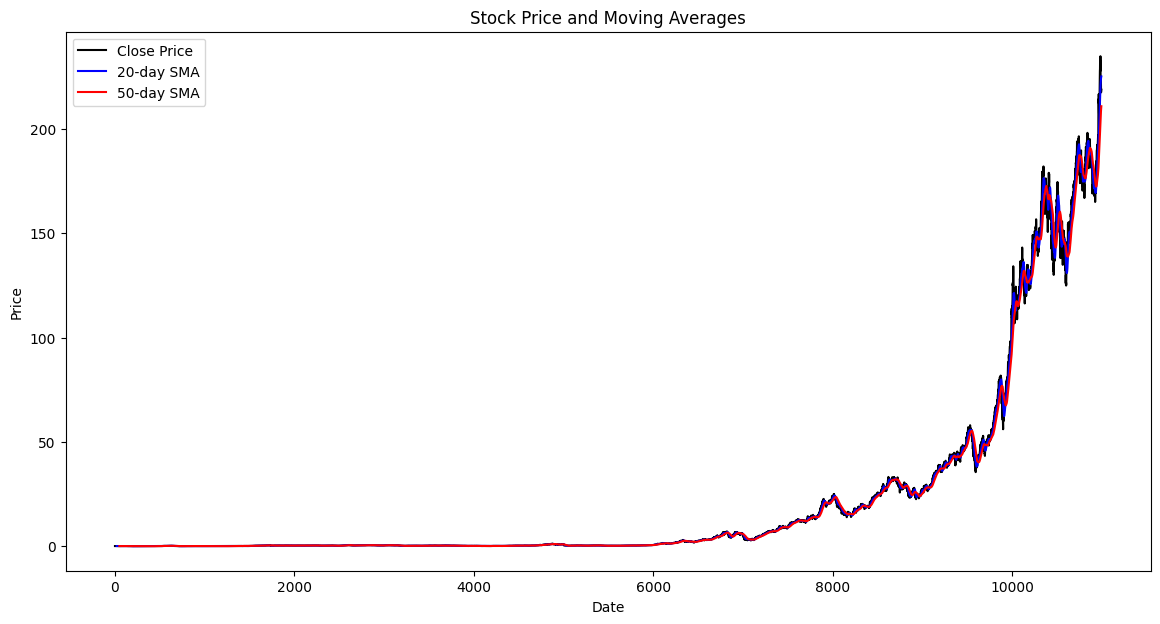

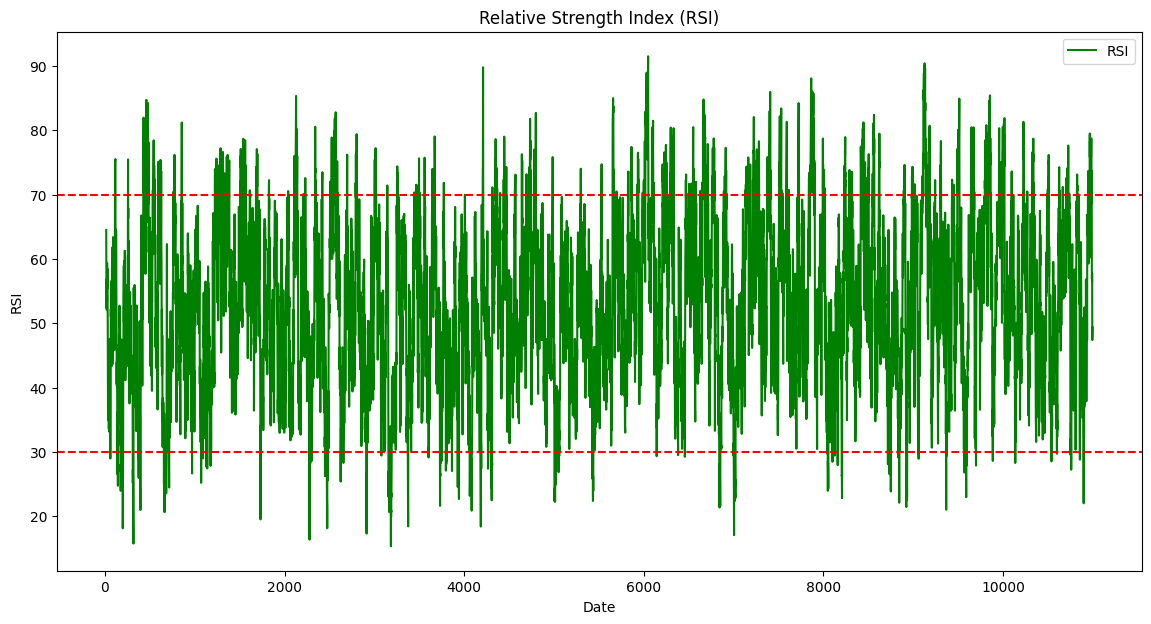

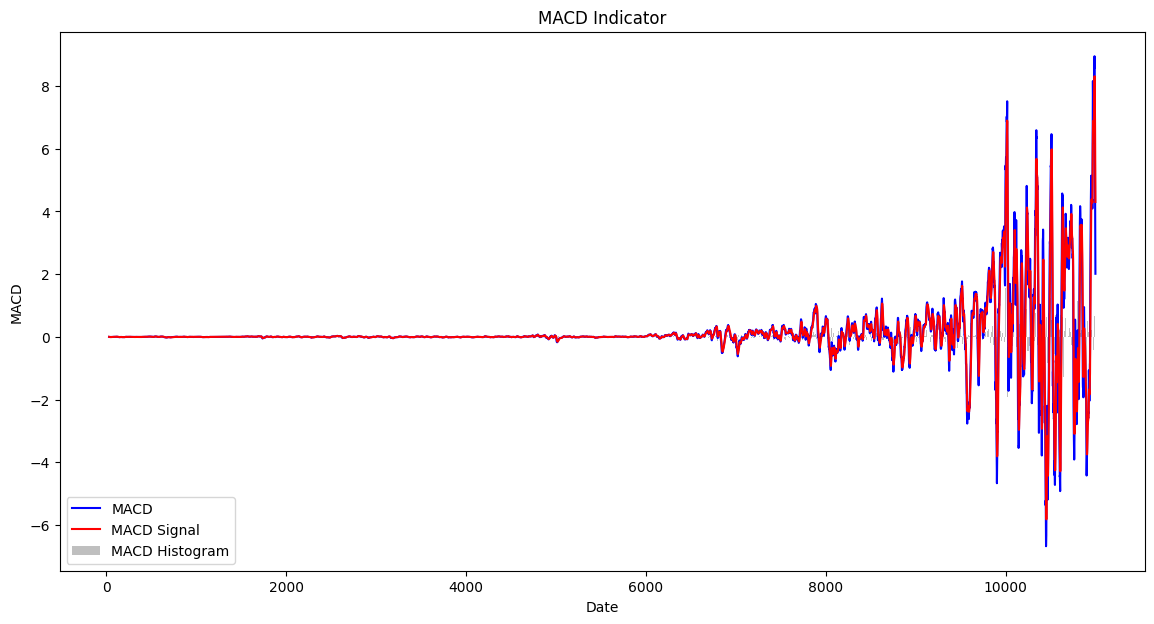

In [21]:
# Ensure the required columns are present
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

# Calculate Moving Averages
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)  # 20-day Simple Moving Average
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)  # 50-day Simple Moving Average

# Calculate RSI (Relative Strength Index)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)  # 14-day RSI

# Calculate MACD (Moving Average Convergence Divergence)
macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal
df['MACD_Hist'] = macdhist

# Display the DataFrame with the new indicators
print(df.head())

# Plot Closing Price with Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['SMA_20'], label='20-day SMA', color='blue')
plt.plot(df['SMA_50'], label='50-day SMA', color='red')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(df['RSI'], label='RSI', color='green')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='red', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

# Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='MACD Signal', color='red')
plt.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

